In [2]:
import numpy as np
import pandas as pd
import sklearn

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")

In [8]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [11]:
df.shape

(1067, 13)

In [12]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [16]:
model_name_list = list(df['MAKE'].unique())

In [17]:
model_name_list

['ACURA',
 'ASTON MARTIN',
 'AUDI',
 'BENTLEY',
 'BMW',
 'BUICK',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'DODGE',
 'FIAT',
 'FORD',
 'GMC',
 'HONDA',
 'HYUNDAI',
 'INFINITI',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LAMBORGHINI',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'MASERATI',
 'MAZDA',
 'MERCEDES-BENZ',
 'MINI',
 'MITSUBISHI',
 'NISSAN',
 'PORSCHE',
 'RAM',
 'ROLLS-ROYCE',
 'SCION',
 'SMART',
 'SRT',
 'SUBARU',
 'TOYOTA',
 'VOLKSWAGEN',
 'VOLVO']

In [27]:
model_wise_carbon_consumption = df.groupby('MAKE').agg({'CO2EMISSIONS':'sum'})

In [29]:
model_wise_carbon_consumption.head()

,CO2EMISSIONS
MAKE,
ACURA,2712
ASTON MARTIN,2461
AUDI,13509
BENTLEY,2872
BMW,16135


In [32]:
ordered_model_wise_carbon_emission =(
    df.groupby('MAKE')['CO2EMISSIONS']
    .sum()
    .reset_index()
    .sort_values('CO2EMISSIONS', ascending = False)
)



In [35]:
ordered_model_wise_carbon_emission.head(8)

,MAKE,CO2EMISSIONS
11,FORD,23936
7,CHEVROLET,23472
25,MERCEDES-BENZ,16383
4,BMW,16135
12,GMC,16084
2,AUDI,13509
36,TOYOTA,11524
29,PORSCHE,11389


In [40]:
car_per_brand = (df.groupby('MAKE')['CO2EMISSIONS'].size().reset_index(name = 'frequency').sort_values('frequency', ascending = False))

In [42]:
car_per_brand.head(8)

,MAKE,frequency
11,FORD,90
7,CHEVROLET,86
4,BMW,64
25,MERCEDES-BENZ,59
12,GMC,49
2,AUDI,49
36,TOYOTA,49
29,PORSCHE,44


So from the two tables, we have come to a decision that, number of cars has a positive linear relation with CO2Emissions

In [43]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


All the cars are of 2014 model. we can see from the statistics here that 75% of the cars have a combined fuel consumption falling within a range of up to almost three times that of the most efficient car, with respective values of 31 MPG and 11 MPG. 

The highest fuel consumer at 60 MPG is suspiciously high but could be legitimate.

In [46]:
df = df.drop(columns = ['MODELYEAR'])

In [47]:
df.sample(4)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
726,MERCEDES-BENZ,C 350,COMPACT,3.5,6,AS7,Z,12.0,8.6,10.5,27,242
727,MERCEDES-BENZ,C 350 4MATIC,COMPACT,3.5,6,AS7,Z,11.9,8.6,10.4,27,239
457,GMC,SIERRA,PICKUP TRUCK - STANDARD,6.2,8,A6,Z,16.3,11.4,14.1,20,324
225,CHEVROLET,EXPRESS 2500 PASSENGER,VAN - PASSENGER,6.0,8,A6,E,30.0,20.4,25.7,11,411


In [48]:
# Created a new dataframe which can contribute to the co2emissions
new_df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
new_df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
269,3.6,6,12.3,283
892,3.0,6,10.4,281
650,3.0,6,12.3,283
820,2.0,4,12.3,283
721,2.0,4,8.0,184


## Visualizing the features

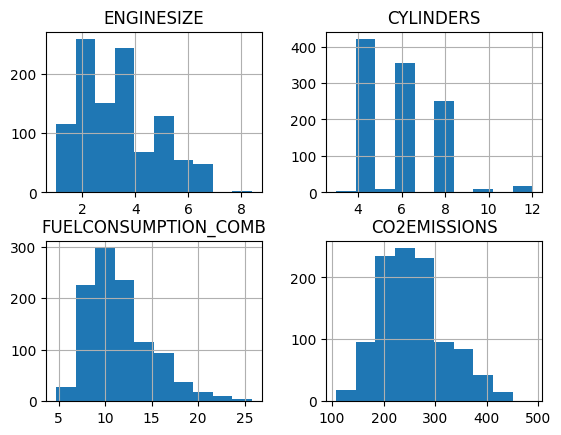

In [53]:
viz = new_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.  
As we might expect, combined fuel consumption and CO2 emission have very similar distributions.  


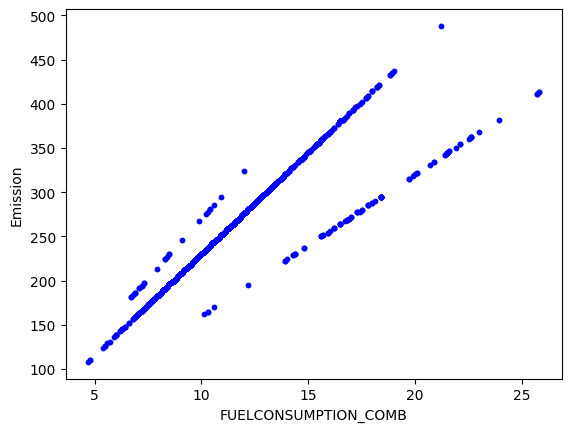

In [61]:
plt.scatter(new_df.FUELCONSUMPTION_COMB,new_df.CO2EMISSIONS, color = 'blue', s = 10)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

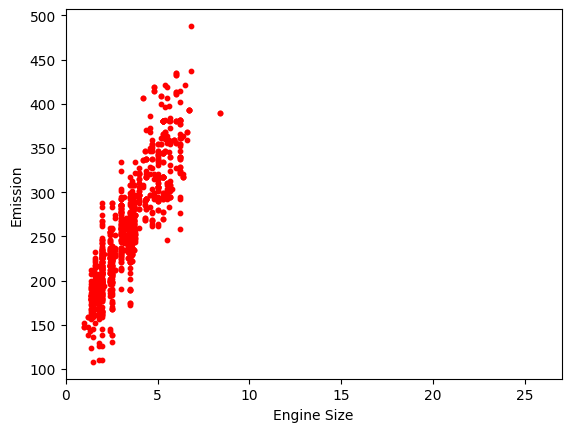

In [62]:
plt.scatter(new_df.ENGINESIZE,new_df.CO2EMISSIONS,color = 'red', s = 10)
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.xlim(0,27)
plt.show()

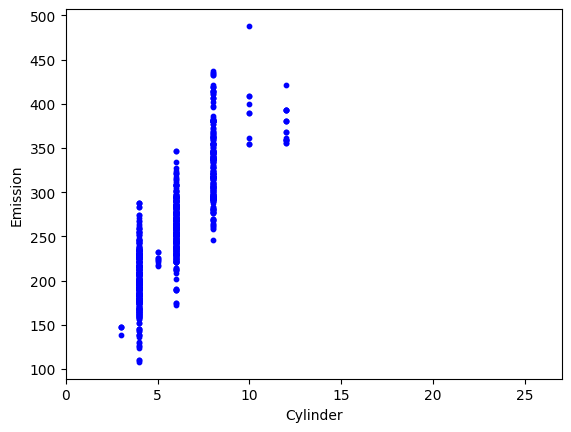

In [63]:
plt.scatter(new_df.CYLINDERS,new_df.CO2EMISSIONS,color = 'blue', s = 10)
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.xlim(0,27)
plt.show()

## Extract the input features and the labels from the dataset

In [65]:
X = new_df.ENGINESIZE.to_numpy()
y = new_df.CO2EMISSIONS.to_numpy()



In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [68]:
X_train.shape

(853,)

## Build a simple linear regression model

In [69]:
from sklearn import linear_model

# Create a model object
regressor = linear_model.LinearRegression()

# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
regressor.fit(X_train.reshape(-1,1),y_train)


# Print the coefficient
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.99297872443392
Intercept:  126.28970217408775


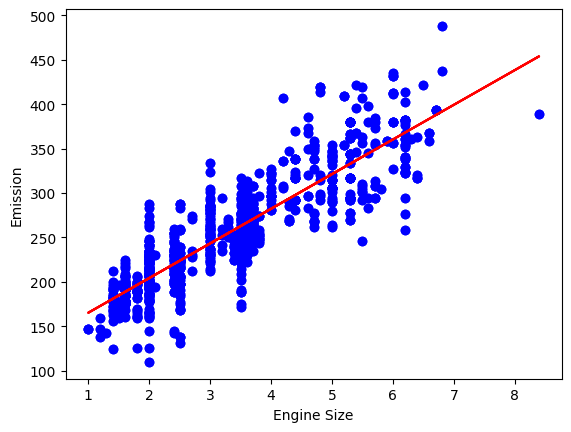

In [71]:
plt.scatter(X_train,y_train, color = 'blue')
plt.plot(X_train, regressor.coef_*X_train + regressor.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

## The model performance on test data

In [72]:
y_test_ = regressor.predict(X_test.reshape(-1,1))

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

mse = mean_squared_error(y_test, y_test_)
mae = mean_absolute_error(y_test,y_test_)


print(f"Mean Squarred Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squarred Error: 985.94
Mean Absolute Error: 24.10


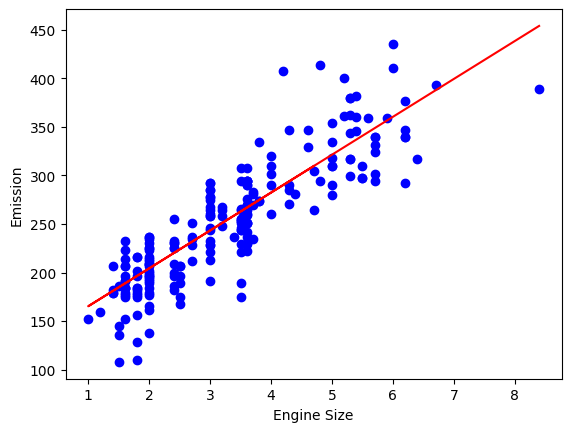

In [73]:
plt.scatter(X_test,y_test, color = 'blue')
plt.plot(X_test, regressor.coef_*X_test + regressor.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

In [74]:
df.sample(5)

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
304,DODGE,CHARGER (MDS),FULL-SIZE,5.7,8,A5,X,15.8,9.2,12.8,22,294
824,MITSUBISHI,MIRAGE,COMPACT,1.2,3,AV,X,6.4,5.4,6.0,47,138
524,HYUNDAI,VELOSTER TURBO,COMPACT,1.6,4,A6,X,9.9,7.5,8.8,32,202
251,CHEVROLET,SONIC 5,MID-SIZE,1.4,4,AS6,X,9.1,6.7,8.0,35,184
428,FORD,TRANSIT CONNECT,SPECIAL PURPOSE VEHICLE,1.6,4,AS6,X,10.8,8.0,9.5,30,218


In [76]:
mulreg_df = df.drop(['MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE'], axis = 1)

In [77]:
mulreg_df.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
364,3.5,6,14.8,10.7,13.0,22,299
938,1.0,3,6.9,5.7,6.4,44,147
925,6.7,12,20.7,12.8,17.1,17,393
17,4.7,8,18.1,12.2,15.4,18,354
481,2.4,4,9.0,6.6,7.9,36,182


In [78]:
mulreg_df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [80]:
mulreg_df = mulreg_df[['ENGINESIZE', 'FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

In [81]:
mulreg_df.sample(8)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1029,2.0,29,221
198,1.4,36,179
684,3.7,25,262
371,6.2,18,366
1051,2.0,26,246
189,3.6,24,269
68,4.0,22,297
167,3.6,25,260


## Plotting

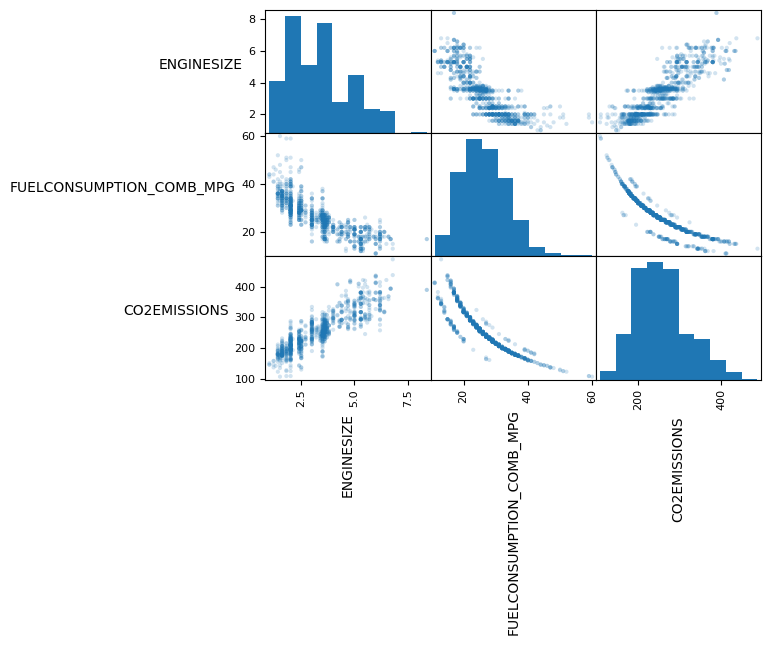

<Figure size 2000x700 with 0 Axes>

In [84]:
axes = pd.plotting.scatter_matrix(mulreg_df, alpha = 0.2) # alpha will set the transperecy of point

# now labelling the graph
plt.figure(figsize = (20,7))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')


plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


In [89]:
### Extract the input features and the output value
X = mulreg_df.iloc[:,:2].to_numpy()
y = mulreg_df.iloc[:,2].to_numpy()

In [90]:
X,y

(array([[ 2. , 33. ],
        [ 2.4, 29. ],
        [ 1.5, 48. ],
        ...,
        [ 3. , 24. ],
        [ 3.2, 25. ],
        [ 3.2, 22. ]]),
 array([196, 221, 136, ..., 271, 260, 294]))

In [91]:
X.shape,y.shape

((1067, 2), (1067,))

## Preprocessing dataset

In [92]:
from sklearn import preprocessing

std_sclr = preprocessing.StandardScaler()

X_std = std_sclr.fit_transform(X)

In [93]:
pd.DataFrame(X_std).describe().round(2)


,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


## Create train and test datasets

In [95]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X_std,y, test_size =0.2, random_state = 42)

## Build a multiple Linear Regression Model

In [97]:
from sklearn import linear_model

multi_regressor = linear_model.LinearRegression()

# Train the model
multi_regressor.fit(X_train, y_train)

# print the coefficient
coef_ = multi_regressor.coef_
interceptor_ = multi_regressor.intercept_

print(f"Coefficient: {coef_}")
print(f"Interceptor: {interceptor_}")



Coefficient: [ 25.27339614 -37.4381472 ]
Interceptor: 256.2907248808642


# Logistic Regression

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import sklearn
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing


## load the dataset

In [104]:
# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


## Data Preprocessing

In [100]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [101]:
churn_df.corr()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,0.763134,...,0.018791,-0.164921,-0.009747,0.080650,-0.099128,0.864388,0.310045,0.246353,0.134237,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,0.373547,...,0.006803,-0.078395,0.020002,0.030625,-0.048279,0.379413,0.093600,0.313359,0.041055,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,0.421782,...,-0.105812,-0.191058,-0.019967,-0.030494,-0.172171,0.409357,0.018386,0.212929,-0.016841,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,0.041808,...,0.056977,0.102809,0.081133,-0.031556,-0.041392,0.065595,-0.156498,0.680313,0.030725,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,-0.072735,...,0.258698,0.552996,-0.016247,-0.132215,0.427315,-0.054581,-0.007227,0.206718,0.013127,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,0.363386,...,0.038381,-0.250044,0.119708,0.173247,-0.151965,0.377186,0.068718,0.540052,0.131292,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,-0.097618,...,0.308633,0.623509,-0.034021,-0.103499,0.603133,-0.113065,-0.027882,0.083494,0.174955,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,0.322514,...,0.251069,-0.067146,0.370878,0.311056,-0.045058,0.351030,0.080060,0.156920,0.407553,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,-0.073043,...,0.667535,0.343631,0.389670,0.382925,0.321433,-0.042637,0.178317,0.033558,0.598156,0.174356
longmon,0.763134,0.373547,0.421782,0.041808,-0.072735,0.363386,-0.097618,0.322514,-0.073043,1.000000,...,-0.001372,-0.223929,0.032913,0.060614,-0.124605,0.901631,0.247302,0.122550,0.072519,-0.292026


In [105]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]

churn_df['churn'] = churn_df['churn'].astype('int')

churn_df.sample(5)

/var/folders/y2/33vgfdz176b018l37jlk7z3m0000gn/T/ipykernel_30896/2212463662.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,churn
12,56.0,50.0,1.0,80.0,2.0,24.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
124,59.0,55.0,29.0,42.0,3.0,21.0,0.0,0
98,62.0,76.0,20.0,35.0,3.0,18.0,0.0,0
155,53.0,37.0,7.0,25.0,1.0,2.0,0.0,0


In [106]:
churn_df.sample(15)

,tenure,age,address,income,ed,employ,equip,churn
142,60.0,57.0,18.0,72.0,5.0,30.0,1.0,0
143,63.0,37.0,1.0,45.0,4.0,9.0,1.0,0
119,24.0,58.0,30.0,24.0,1.0,5.0,0.0,0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
121,10.0,28.0,9.0,75.0,4.0,1.0,1.0,1
128,30.0,28.0,1.0,20.0,1.0,8.0,0.0,1
23,3.0,37.0,13.0,24.0,1.0,3.0,0.0,0
194,57.0,60.0,20.0,14.0,2.0,27.0,0.0,0
154,60.0,53.0,22.0,171.0,1.0,37.0,0.0,0
116,71.0,41.0,10.0,73.0,2.0,23.0,0.0,0


In [108]:
X = churn_df.iloc[:,:-1].to_numpy()
y  = churn_df.iloc[:,-1].to_numpy()

In [109]:
X.shape,y.shape

((200, 7), (200,))

In [110]:
# Standard Scaling the data
std_scaler = preprocessing.StandardScaler()

X_std = std_scaler.fit_transform(X)

In [111]:
pd.DataFrame(X_std).describe().round(2)

,0,1,2,3,4,5,6
count,200.00,200.00,200.00,200.00,200.00,200.00,200.00
mean,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.60,-1.70,-1.15,-0.52,-1.42,-1.14,-0.86
25%,-0.87,-0.78,-0.85,-0.34,-0.64,-0.81,-0.86
50%,-0.09,-0.09,-0.26,-0.21,0.14,-0.30,-0.86
75%,0.91,0.75,0.63,0.04,0.92,0.76,1.16
max,1.69,2.67,3.59,12.43,1.70,3.78,1.16


In [112]:
X_std[:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [113]:
y[:5]

array([1, 1, 0, 0, 0])

## Splitting the dataset


In [114]:
X_train,X_test,y_train, y_test = train_test_split(X_std, y, test_size=0.2,random_state=42)

In [115]:
X_train.shape,y_train.shape

((160, 7), (160,))

## Create the Model

In [117]:
lr = linear_model.LogisticRegression()

# Train the model
lr.fit(X_train,y_train)

# print the coefficient
weights = lr.coef_
bias = lr.intercept_

print(f"Weights are: {weights}")
print(f"Bias are: {bias}")


Weights are: [[-0.61194839 -0.31272426  0.16708781  0.06276296  0.31148584 -0.65548037
   0.37311316]]
Bias are: [-1.19246736]


In [119]:
yhat = lr.predict(X_test)
yhat[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0])

In [120]:
yhat_prob  = lr.predict_proba(X_test)
yhat_prob[:10]

array([[0.51878155, 0.48121845],
       [0.22539374, 0.77460626],
       [0.78053821, 0.21946179],
       [0.68476137, 0.31523863],
       [0.82116484, 0.17883516],
       [0.30994702, 0.69005298],
       [0.97893094, 0.02106906],
       [0.53468732, 0.46531268],
       [0.50226993, 0.49773007],
       [0.90300796, 0.09699204]])

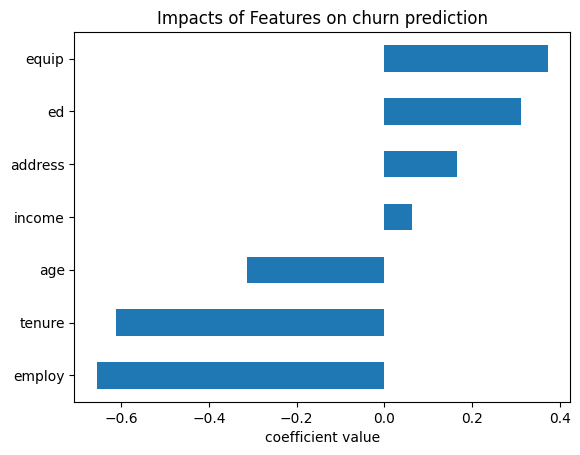

In [124]:
coefficients = pd.Series(lr.coef_[0], index = churn_df.columns[:-1])
coefficients.sort_values().plot(kind = 'barh')
plt.title('Impacts of Features on churn prediction')
plt.xlabel('coefficient value')
plt.show()


In [123]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn'], dtype='object')

## Performance Evaluation

In [125]:
from sklearn.metrics import log_loss
l_loss = log_loss(y_test, yhat_prob)
print(f"Log loss of our model: {l_loss}")

Log loss of our model: 0.4068959657047867
